#Load Data

In [ ]:
# 1. Load the data and save it to a pandas dataframe
# 2. EDA
# 3. Preprocessing: Deal with missing values (replace or drop)
# 4. Preprocessing: Deal with non-number value-encode to categorical(numeric) data
# 5. Feature selection: define X, Y (using correlation matrix) -
#    not all features can be processed
# 6. Split the data to 70:30
# 7. Train the data using several models
# 8. Evaluate the model
# 9. Improve the model: Data resampling (OPT)
# 10. Improve the model: Hyperparameter tuning


In [ ]:
import pandas as pd
import seaborn as sb

In [ ]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/refs/heads/master/titanic_train.csv

--2025-05-14 13:23:04--  https://raw.githubusercontent.com/andrychowanda/COMP6577/refs/heads/master/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72499 (71K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  70.80K  --.-KB/s    in 0.02s   

2025-05-14 13:23:05 (3.35 MB/s) - ‘titanic_train.csv’ saved [72499/72499]



In [ ]:
data = pd.read_csv('titanic_train.csv')

#EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [ ]:
print(data["survived"].value_counts())

survived
0    537
1    313
Name: count, dtype: int64


<Axes: >

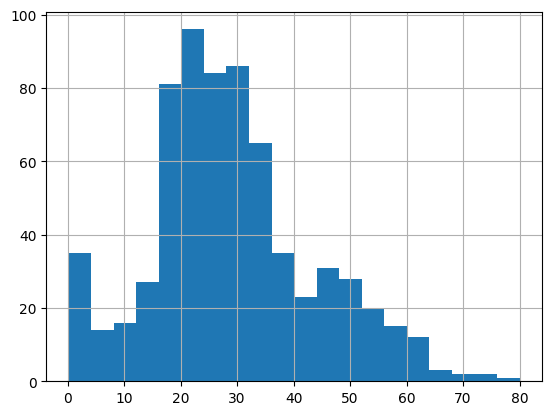

In [ ]:
data["age"].hist(bins=20)

<Axes: >

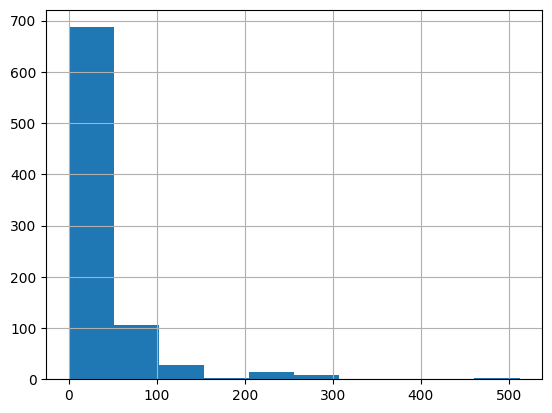

In [ ]:
data["fare"].hist(bins=10)

In [ ]:
data["pclass"].value_counts()

,count
pclass,
3,478
1,206
2,166


<ipython-input-10-f517af1f314c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data["sex"], palette="viridis")


<Axes: xlabel='count', ylabel='sex'>

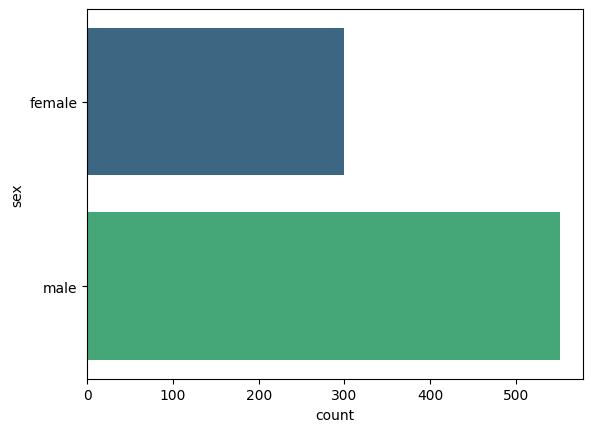

In [ ]:
sb.countplot(data["sex"], palette="viridis")

<ipython-input-11-1bc0791dbd55>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data["embarked"], palette="viridis")


<Axes: xlabel='count', ylabel='embarked'>

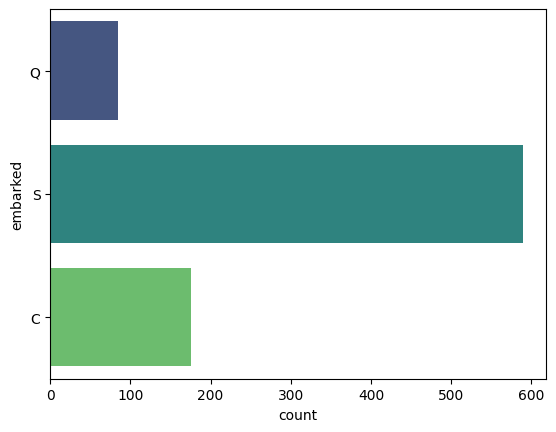

In [ ]:
sb.countplot(data["embarked"], palette="viridis")

<Axes: xlabel='sex', ylabel='survived'>

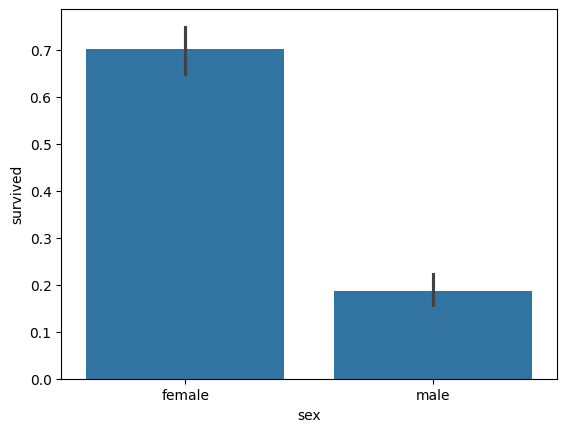

In [ ]:
sb.barplot(x="sex", y="survived", data=data)

<Axes: xlabel='pclass', ylabel='survived'>

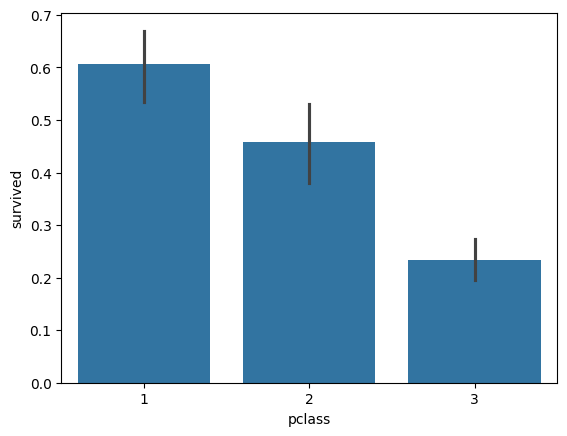

In [ ]:
sb.barplot(x="pclass", y="survived", data=data)

<Axes: xlabel='embarked', ylabel='survived'>

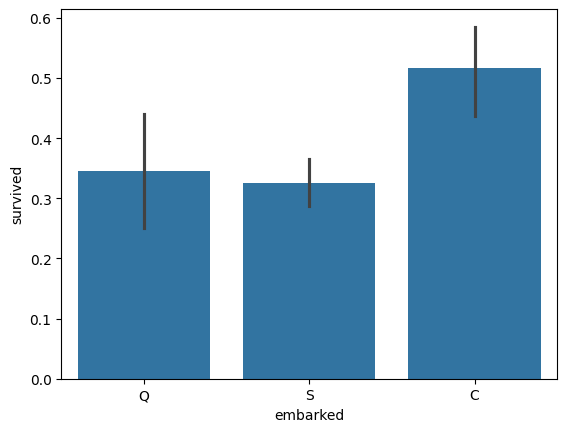

In [ ]:
sb.barplot(x="embarked", y="survived", data=data)

# Preprocessing: Deal with missing values

In [ ]:
data["age"] = data["age"].fillna(data["age"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [ ]:
data["fare"] = data["fare"].fillna(data["fare"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [ ]:
data["cabin"] = data["cabin"].fillna("U")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         850 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [ ]:
data = data.dropna(subset="embarked")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    object 
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         849 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 106.1+ KB


In [ ]:
print(data["cabin"].value_counts())
data["cabin"] = data["cabin"].map(lambda x: x[0])
print(data["cabin"].value_counts())

cabin
U                  659
B57 B59 B63 B66      4
B96 B98              4
G6                   4
D                    4
                  ... 
C46                  1
E31                  1
C93                  1
C39                  1
B37                  1
Name: count, Length: 135, dtype: int64
cabin
U    659
C     62
B     44
D     31
E     24
F     12
A     12
G      4
T      1
Name: count, dtype: int64


<ipython-input-19-06376797666f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cabin"] = data["cabin"].map(lambda x: x[0])


#Preprocessing: Deal with non-number value

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["sex"] = encoder.fit_transform(data["sex"])
data["embarked"] = encoder.fit_transform(data["embarked"])
data["cabin"] = encoder.fit_transform(data["cabin"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    int64  
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         849 non-null    int64  
 10  embarked      849 non-null    int64  
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 106.1+ KB


#Feature Selection

<Axes: >

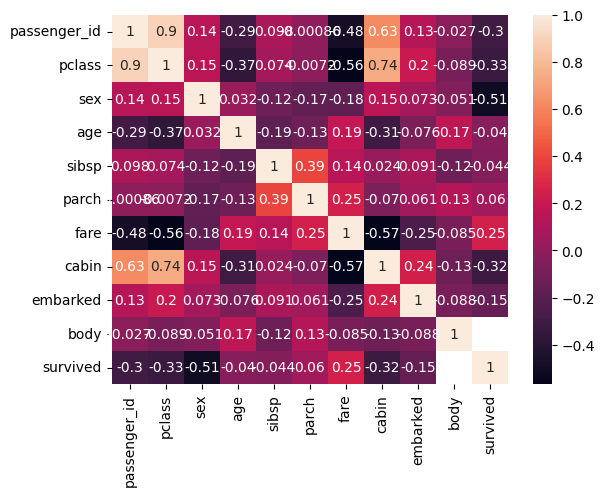

In [ ]:
dataCorr = data.corr(numeric_only=True)
sb.heatmap(dataCorr, annot=True)

In [ ]:
X = data[["pclass", "sex", "fare", "cabin"]]
Y = data["survived"]

In [ ]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.3,
                                                random_state=42)

# Data Modelling (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(XTrain, YTrain)

In [ ]:
from sklearn.metrics import classification_report

YTestPred = model.predict(XTest)
YTrainPred = model.predict(XTrain)
print("Train : " , classification_report(YTrain, YTrainPred))
print("Test : ", classification_report(YTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.91      0.97      0.94       368
           1       0.95      0.85      0.90       226

    accuracy                           0.93       594
   macro avg       0.93      0.91      0.92       594
weighted avg       0.93      0.93      0.93       594

Test :                precision    recall  f1-score   support

           0       0.83      0.80      0.81       169
           1       0.63      0.67      0.65        86

    accuracy                           0.76       255
   macro avg       0.73      0.74      0.73       255
weighted avg       0.76      0.76      0.76       255



In [ ]:
from sklearn.metrics import roc_auc_score

print("Train : " , roc_auc_score(YTrain, YTrainPred))
print("Test : ", roc_auc_score(YTest, YTestPred))

Train :  0.9111918045402078
Test :  0.7366175863492499


<Axes: xlabel='Predicted', ylabel='Actual'>

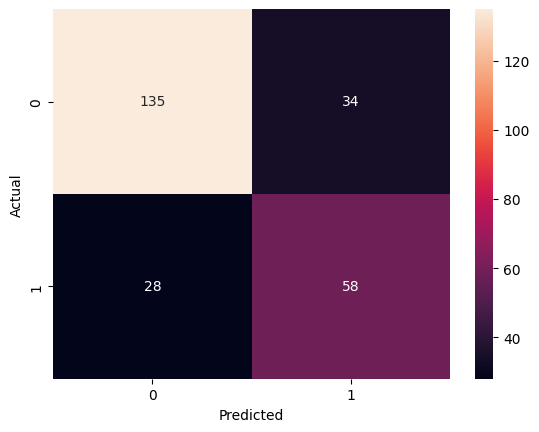

In [ ]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

#Data Resampling

In [ ]:
#0    537 -> 312  -> 537
#1    312 -> 312  -> 537

nNot, nSurvived = data["survived"].value_counts()
dataSurvived = data[data["survived"] == 1]
dataNot = data[data["survived"] == 0]

dataNot = dataNot.sample(nSurvived)
dataTitanicUResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicUResampled["survived"].value_counts())
print(dataTitanicUResampled.info())
print(dataTitanicUResampled.describe())

survived
0    312
1    312
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 23 to 847
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  624 non-null    int64  
 1   pclass        624 non-null    int64  
 2   name          624 non-null    object 
 3   sex           624 non-null    int64  
 4   age           624 non-null    float64
 5   sibsp         624 non-null    int64  
 6   parch         624 non-null    int64  
 7   ticket        624 non-null    object 
 8   fare          624 non-null    float64
 9   cabin         624 non-null    int64  
 10  embarked      624 non-null    int64  
 11  boat          303 non-null    object 
 12  body          40 non-null     float64
 13  home.dest     351 non-null    object 
 14  survived      624 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 78.0+ KB
None
       passenger_id      pclass         sex    

In [ ]:
nNot, nSurvived = data["survived"].value_counts()
dataSurvived = data[data["survived"] == 1]
dataNot = data[data["survived"] == 0]

dataSurvived = dataSurvived.sample(nNot, replace=True)
dataTitanicOResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicOResampled["survived"].value_counts())
print(dataTitanicOResampled.info())
print(dataTitanicOResampled.describe())

survived
0    537
1    537
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 1 to 220
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1074 non-null   int64  
 1   pclass        1074 non-null   int64  
 2   name          1074 non-null   object 
 3   sex           1074 non-null   int64  
 4   age           1074 non-null   float64
 5   sibsp         1074 non-null   int64  
 6   parch         1074 non-null   int64  
 7   ticket        1074 non-null   object 
 8   fare          1074 non-null   float64
 9   cabin         1074 non-null   int64  
 10  embarked      1074 non-null   int64  
 11  boat          525 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     645 non-null    object 
 14  survived      1074 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 134.2+ KB
None
       passenger_id       pclass          sex 

In [ ]:
XU = dataTitanicUResampled[["pclass", "sex", "age", "cabin"]]
YU = dataTitanicUResampled["survived"]

XO = dataTitanicOResampled[["pclass", "sex", "age", "cabin"]]
YO = dataTitanicOResampled["survived"]

XUTrain, XUTest, YUTrain, YUTest = train_test_split(XU, YU, test_size=0.3)
XOTrain, XOTest, YOTrain, YOTest = train_test_split(XO, YO, test_size=0.3)

In [ ]:
model = DecisionTreeClassifier().fit(XUTrain, YUTrain)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
YTestPred = model.predict(XUTest)
YTrainPred = model.predict(XUTrain)
print("Train : " , classification_report(YUTrain, YTrainPred))
print("Test : ", classification_report(YUTest, YTestPred))

In [ ]:
print("Train : " , roc_auc_score(YUTrain, YTrainPred))
print("Test : ", roc_auc_score(YUTest, YTestPred))

In [ ]:
ConfusionMatrixDisplay = pd.crosstab(YUTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

In [ ]:
YTestPred = model.predict(XOTest)
YTrainPred = model.predict(XOTrain)
print("Train : " , classification_report(YOTrain, YTrainPred))
print("Test : ", classification_report(YOTest, YTestPred))

In [ ]:
print("Train : " , roc_auc_score(YOTrain, YTrainPred))
print("Test : ", roc_auc_score(YOTest, YTestPred))

In [ ]:
ConfusionMatrixDisplay = pd.crosstab(YOTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

#Improve the model: Hyper-parameter search

In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {"criterion" : ["gini", "entropy"],
              "max_depth" : [100, 1000, 3000]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True)
grid.fit(XOTrain, YOTrain)

print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 3000}
DecisionTreeClassifier(max_depth=3000)


In [ ]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = 3000).fit(XOTrain, YOTrain)

In [ ]:
YTestPred = model.predict(XOTest)
YTrainPred = model.predict(XOTrain)
print("Train : " , classification_report(YOTrain, YTrainPred))
print("Test : ", classification_report(YOTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.90      0.92      0.91       374
           1       0.92      0.90      0.91       377

    accuracy                           0.91       751
   macro avg       0.91      0.91      0.91       751
weighted avg       0.91      0.91      0.91       751

Test :                precision    recall  f1-score   support

           0       0.81      0.80      0.81       163
           1       0.80      0.81      0.80       160

    accuracy                           0.80       323
   macro avg       0.80      0.80      0.80       323
weighted avg       0.80      0.80      0.80       323



In [ ]:
print("Train : " , roc_auc_score(YOTrain, YTrainPred))
print("Test : ", roc_auc_score(YOTest, YTestPred))

Train :  0.9108214300912069
Test :  0.804965490797546


<Axes: xlabel='Predicted', ylabel='Actual'>

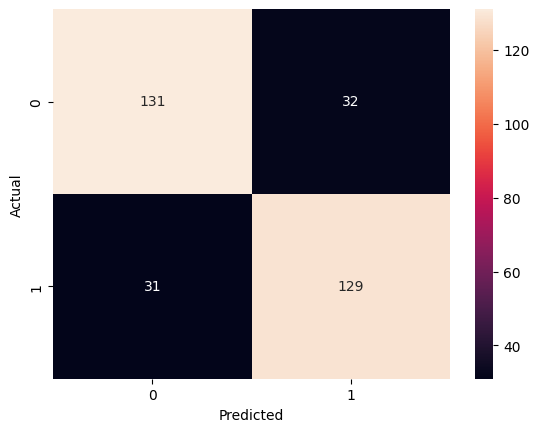

In [ ]:
ConfusionMatrixDisplay = pd.crosstab(YOTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

# Data Modelling (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(XTrain, YTrain)

In [ ]:
from sklearn.metrics import classification_report

YTestPred = model.predict(XTest)
YTrainPred = model.predict(XTrain)
print("Train : " , classification_report(YTrain, YTrainPred))
print("Test : ", classification_report(YTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.92      0.97      0.94       368
           1       0.94      0.86      0.90       226

    accuracy                           0.93       594
   macro avg       0.93      0.91      0.92       594
weighted avg       0.93      0.93      0.93       594

Test :                precision    recall  f1-score   support

           0       0.83      0.80      0.82       169
           1       0.64      0.67      0.66        86

    accuracy                           0.76       255
   macro avg       0.73      0.74      0.74       255
weighted avg       0.76      0.76      0.76       255



In [ ]:
from sklearn.metrics import roc_auc_score

print("Train : " , roc_auc_score(YTrain, YTrainPred))
print("Test : ", roc_auc_score(YTest, YTestPred))

Train :  0.9128991919969218
Test :  0.7395761662309068


<Axes: xlabel='Predicted', ylabel='Actual'>

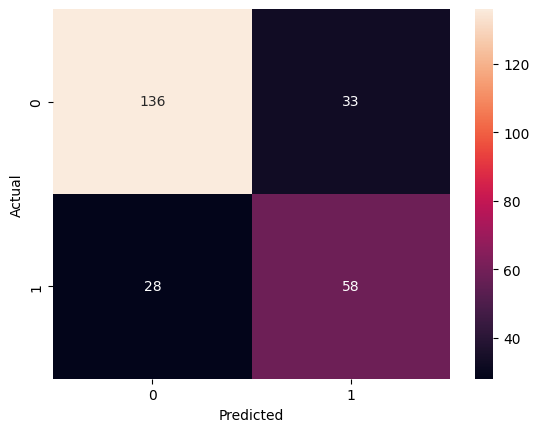

In [ ]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

#Data Resampling (RF)

In [ ]:
#0    537 -> 312  -> 537
#1    312 -> 312  -> 537

nNot, nSurvived = data["survived"].value_counts()
dataSurvived = data[data["survived"] == 1]
dataNot = data[data["survived"] == 0]

dataNot = dataNot.sample(nSurvived)
dataTitanicUResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicUResampled["survived"].value_counts())
print(dataTitanicUResampled.info())
print(dataTitanicUResampled.describe())

survived
0    312
1    312
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 668 to 847
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  624 non-null    int64  
 1   pclass        624 non-null    int64  
 2   name          624 non-null    object 
 3   sex           624 non-null    int64  
 4   age           624 non-null    float64
 5   sibsp         624 non-null    int64  
 6   parch         624 non-null    int64  
 7   ticket        624 non-null    object 
 8   fare          624 non-null    float64
 9   cabin         624 non-null    int64  
 10  embarked      624 non-null    int64  
 11  boat          306 non-null    object 
 12  body          46 non-null     float64
 13  home.dest     355 non-null    object 
 14  survived      624 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 78.0+ KB
None
       passenger_id      pclass         sex   

In [ ]:
nNot, nSurvived = data["survived"].value_counts()
dataSurvived = data[data["survived"] == 1]
dataNot = data[data["survived"] == 0]

dataSurvived = dataSurvived.sample(nNot, replace=True)
dataTitanicOResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicOResampled["survived"].value_counts())
print(dataTitanicOResampled.info())
print(dataTitanicOResampled.describe())

survived
0    537
1    537
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 1 to 185
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1074 non-null   int64  
 1   pclass        1074 non-null   int64  
 2   name          1074 non-null   object 
 3   sex           1074 non-null   int64  
 4   age           1074 non-null   float64
 5   sibsp         1074 non-null   int64  
 6   parch         1074 non-null   int64  
 7   ticket        1074 non-null   object 
 8   fare          1074 non-null   float64
 9   cabin         1074 non-null   int64  
 10  embarked      1074 non-null   int64  
 11  boat          521 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     636 non-null    object 
 14  survived      1074 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 134.2+ KB
None
       passenger_id       pclass          sex 

In [ ]:
XU = dataTitanicUResampled[["pclass", "sex", "age", "cabin"]]
YU = dataTitanicUResampled["survived"]

XO = dataTitanicOResampled[["pclass", "sex", "age", "cabin"]]
YO = dataTitanicOResampled["survived"]

XUTrain, XUTest, YUTrain, YUTest = train_test_split(XU, YU, test_size=0.3)
XOTrain, XOTest, YOTrain, YOTest = train_test_split(XO, YO, test_size=0.3)

In [ ]:
model = RandomForestClassifier().fit(XUTrain, YUTrain)

In [ ]:
YTestPred = model.predict(XUTest)
YTrainPred = model.predict(XUTrain)
print("Train : " , classification_report(YUTrain, YTrainPred))
print("Test : ", classification_report(YUTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.90      0.92      0.91       216
           1       0.92      0.90      0.91       220

    accuracy                           0.91       436
   macro avg       0.91      0.91      0.91       436
weighted avg       0.91      0.91      0.91       436

Test :                precision    recall  f1-score   support

           0       0.72      0.71      0.72        96
           1       0.70      0.72      0.71        92

    accuracy                           0.71       188
   macro avg       0.71      0.71      0.71       188
weighted avg       0.71      0.71      0.71       188



In [ ]:
print("Train : " , roc_auc_score(YUTrain, YTrainPred))
print("Test : ", roc_auc_score(YUTest, YTestPred))

Train :  0.9106481481481481
Test :  0.7128623188405797


<Axes: xlabel='Predicted', ylabel='Actual'>

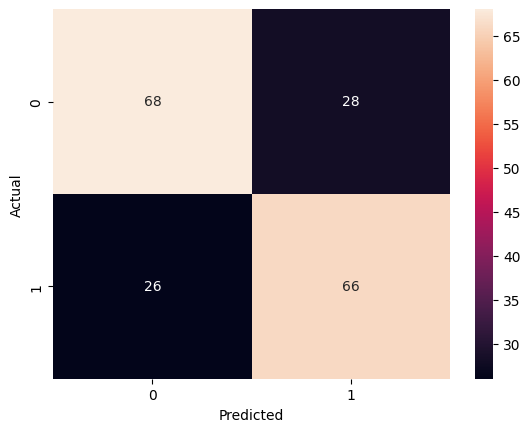

In [ ]:
ConfusionMatrixDisplay = pd.crosstab(YUTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

In [ ]:
YTestPred = model.predict(XOTest)
YTrainPred = model.predict(XOTrain)
print("Train : " , classification_report(YOTrain, YTrainPred))
print("Test : ", classification_report(YOTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.87      0.83      0.85       374
           1       0.84      0.88      0.86       377

    accuracy                           0.85       751
   macro avg       0.86      0.85      0.85       751
weighted avg       0.86      0.85      0.85       751

Test :                precision    recall  f1-score   support

           0       0.83      0.81      0.82       163
           1       0.81      0.83      0.82       160

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



In [ ]:
print("Train : " , roc_auc_score(YOTrain, YTrainPred))
print("Test : ", roc_auc_score(YOTest, YTestPred))

Train :  0.8547780819586094
Test :  0.8205329754601227


<Axes: xlabel='Predicted', ylabel='Actual'>

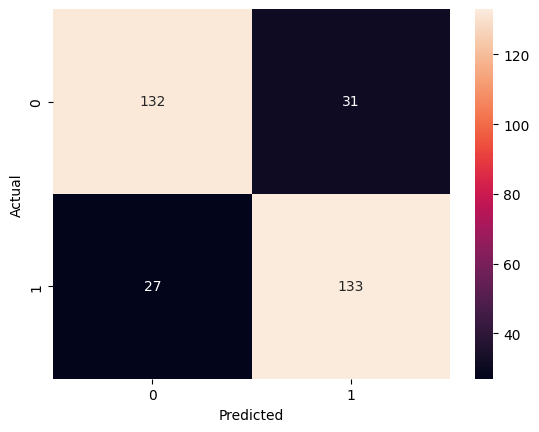

In [ ]:
ConfusionMatrixDisplay = pd.crosstab(YOTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

#Improve the model: Hyper-parameter search (RF)

In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators" : [100, 1000, 3000, 5000],
              "max_depth" : [100, 1000, 3000]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True)
grid.fit(XOTrain, YOTrain)

print(grid.best_params_)
print(grid.best_estimator_)

{'max_depth': 1000, 'n_estimators': 5000}
RandomForestClassifier(max_depth=1000, n_estimators=5000)


In [ ]:
model = RandomForestClassifier(max_depth=1000, n_estimators=5000).fit(XOTrain, YOTrain)

In [ ]:
YTestPred = model.predict(XOTest)
YTrainPred = model.predict(XOTrain)
print("Train : " , classification_report(YOTrain, YTrainPred))
print("Test : ", classification_report(YOTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.91      0.91      0.91       374
           1       0.91      0.91      0.91       377

    accuracy                           0.91       751
   macro avg       0.91      0.91      0.91       751
weighted avg       0.91      0.91      0.91       751

Test :                precision    recall  f1-score   support

           0       0.81      0.79      0.80       163
           1       0.79      0.81      0.80       160

    accuracy                           0.80       323
   macro avg       0.80      0.80      0.80       323
weighted avg       0.80      0.80      0.80       323



In [ ]:
print("Train : " , roc_auc_score(YOTrain, YTrainPred))
print("Test : ", roc_auc_score(YOTest, YTestPred))

Train :  0.9108001531936623
Test :  0.7988880368098159


<Axes: xlabel='Predicted', ylabel='Actual'>

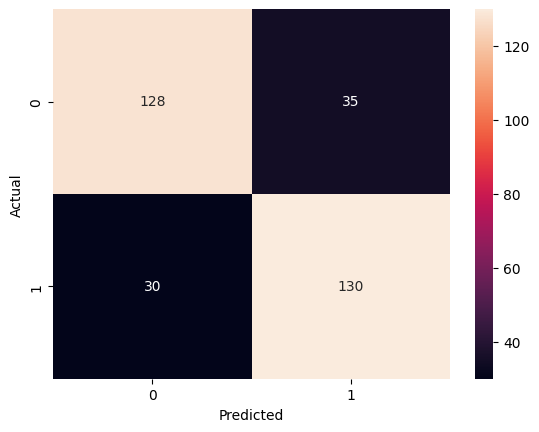

In [ ]:
ConfusionMatrixDisplay = pd.crosstab(YOTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")